In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = [8, 6]
from matplotlib.colors import LogNorm


In [2]:
import xray_emissivity

In [3]:
# eROSITA repsonse files from https://wiki.mpe.mpg.de/eRosita/erocalib_calibration
rmffile = './responses/rmf01_sdtq.fits'
arffile = './responses/arf01_200nmAl_sdtq.fits'
xray = xray_emissivity.XrayEmissivity(energy_range=[0.01,2.0], num_ebins=101, rmf=rmffile, arf=arffile )

In [4]:
xray.tabulate_xray_emissivity()

# Save table as file "etable.hdf5"
xray.save_emissivity_table("etable_erosita")

Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Saving emissivity table as etable_erosita.hdf5


In [5]:
# Read table from file

xray.read_emissivity_table('etable_erosita.hdf5')
print (xray.emin, xray.emax)

0.1 12.0


In [6]:
# Set up interpolation. Need to run this step! 
xray.setup_interpolated_emissivity_table()

In [7]:
emiss = xray.return_interpolated_emissivity(0.018, 0.2)
print (emiss)

-1.2503245640988449e-17


<ipython-input-8-ccf987ec7bc6>:11: RuntimeWarning: divide by zero encountered in log10
  c = ax.imshow(np.log10(xray.etable.T), origin="lower", extent=extent, aspect='auto')


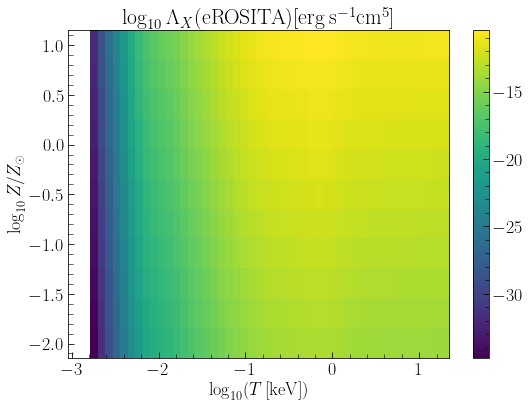

In [8]:
# Plot showing the emissivity table

ltbins = np.log10(xray.tbins)
lzbins = np.log10(xray.zbins)
dx = (ltbins[1]-ltbins[0])/2.
dy = (lzbins[1]-lzbins[0])/2.
extent = [ltbins[0]-dx, ltbins[-1]+dx, lzbins[0]-dy, lzbins[-1]+dy]

fig, ax= plt.subplots()

c = ax.imshow(np.log10(xray.etable.T), origin="lower", extent=extent, aspect='auto')
plt.colorbar(c)

ax.set_xlabel(r'$\log_{10}(T\,[{\rm keV}])$')
ax.set_ylabel(r'$\log_{10}Z/Z_\odot$')
#ax.set_title(r'$\log_{10}\Lambda_{X}(0.01-2\,{\rm keV})[{\rm erg\,s^{-1}cm^3}]$')
ax.set_title(r'$\log_{10}\Lambda_{X}({\rm eROSITA})[{\rm erg\,s^{-1}cm^5}]$')


plt.tight_layout()
plt.show()